In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics-0.json', 'r') as f:
    data0 = json.load(f)
print(data0)

{'variance_metrics': {'full_set_var_sum': 0.8902643837068376, 'full_set_var_values': [0.05948443505389351, 0.046714669229253894, 0.039696302631969195, 0.03674782673599189, 0.03167728064347853, 0.02797635671808303, 0.02494927156285773, 0.023566364281004653, 0.02179784884795069, 0.020592191702824347, 0.019545420212168884, 0.01918089313529805, 0.017742040848013986, 0.016823069122685972, 0.015245432762901724, 0.015013282079433315, 0.01458801348301667, 0.014499276472669378, 0.013429171075257353, 0.012402843988898363, 0.012133714470418418, 0.01163323685251553, 0.011358120436859544, 0.011146149294957783, 0.010715605432548628, 0.010332613925222013, 0.0100265545463485, 0.009605081982565343, 0.00950277100718503, 0.009278382300923486, 0.008876836409761144, 0.008556095639799345, 0.008382061836146485, 0.007993947983573259, 0.007948490043020335, 0.007510736916949947, 0.007226935502460709, 0.007113505789578753, 0.006820089857996875, 0.006777186593434259, 0.006524645977438339, 0.006516285810254869, 0.

In [3]:
with open('run-metrics-1.json', 'r') as f:
    data1 = json.load(f)
print(data1)

{'variance_metrics': {'full_set_var_sum': 0.889987234628505, 'full_set_var_values': [0.05782736576528626, 0.04623858722154702, 0.03874043001815243, 0.03694343391665856, 0.031384881851863874, 0.029340314496299744, 0.025289931253411554, 0.024196765301069168, 0.02126082952070828, 0.020733286754702047, 0.01990308692787058, 0.019031765285104037, 0.01802181133838525, 0.016324595931607715, 0.015078866720698006, 0.0150012037651008, 0.014685533536725314, 0.014134637271063845, 0.013868896104349037, 0.012820055447426731, 0.012416293146548631, 0.012070559971797632, 0.011355149600479451, 0.011174222695321437, 0.010805030718012375, 0.010310715147373448, 0.010069155450196881, 0.009848282611518685, 0.009484569482300793, 0.009287852303625834, 0.008796766022006911, 0.008653235584501142, 0.008531126544860029, 0.00807251123923272, 0.007928864142628722, 0.007474327259723134, 0.00718223817110164, 0.007038582299255741, 0.006950963057434445, 0.006868762785583104, 0.006633687475981559, 0.0063770880465660335, 0

In [4]:
with open('run-metrics-2.json', 'r') as f:
    data2 = json.load(f)
print(data2)

{'variance_metrics': {'full_set_var_sum': 0.8916790804622023, 'full_set_var_values': [0.05457646738744289, 0.0459192113007757, 0.0394333167865245, 0.036387675381031284, 0.03298614278390275, 0.02936332668175386, 0.02726384693081153, 0.025752903188874, 0.02257483388343745, 0.020414083589247005, 0.0201487057485641, 0.019641870189559738, 0.01840280955585985, 0.016926419587686297, 0.016387593581766422, 0.015144729507979664, 0.014265299582639163, 0.013866348548429346, 0.013283795766183049, 0.012999806638419613, 0.012582746115527278, 0.012323279055125032, 0.011502987828883118, 0.010954587168604507, 0.01082789425969412, 0.009910588676502569, 0.00967225894140101, 0.009619679844715545, 0.009300606379276858, 0.008971553411515006, 0.008719739043029839, 0.0084718799326182, 0.008431227870042675, 0.007954371835498936, 0.007745974215030588, 0.007596163421961949, 0.00740363424361513, 0.007048704565895326, 0.007021226043004429, 0.006781948644049294, 0.00653074208020546, 0.006285549106717459, 0.006229317

In [5]:
variance_metrics0 = data0['variance_metrics']
modelling_metrics0 = data0['modelling_metrics']

variance_metrics1 = data1['variance_metrics']
modelling_metrics1 = data1['modelling_metrics']

variance_metrics2 = data2['variance_metrics']
modelling_metrics2 = data2['modelling_metrics']

subset_sizes = modelling_metrics0['subset_size']

In [6]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [7]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [8]:
results = {}

In [9]:
results['subset_size'] = subset_sizes
results['r2_value0'] = variance_metrics0['r2_values']
results['r2_value1'] = variance_metrics1['r2_values']
results['r2_value2'] = variance_metrics2['r2_values']
results['test_accuracy'] = modelling_metrics0['test_accuracies']
results['test_loss'] = modelling_metrics0['test_losses']

In [10]:
for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [11]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,anli_r3_loss,anli_r3_accuracy,mnli_loss,mnli_accuracy,anli_r2_loss,anli_r2_accuracy,semeval_loss,semeval_accuracy,anli_r1_loss,anli_r1_accuracy,sick_loss,sick_accuracy
0,54935,0.889512,0.889353,0.891156,0.861869,0.384283,1.794896,0.341667,0.828674,0.683991,1.967904,0.306,1.818721,0.505176,1.974535,0.284,1.822908,0.504688
1,109870,0.889985,0.889784,0.891419,0.873779,0.336925,1.654415,0.332500,0.708416,0.711249,1.773914,0.290,1.709069,0.504161,1.846494,0.260,1.711985,0.503465
2,164805,0.890194,0.889915,0.891622,0.874898,0.331244,1.639012,0.320833,0.694690,0.717860,1.788305,0.304,1.493008,0.512482,1.962879,0.253,1.495501,0.512026
3,219740,0.890256,0.890014,0.891760,0.890676,0.315373,1.962580,0.320833,0.725004,0.731896,2.103620,0.280,1.829474,0.570530,2.163815,0.276,1.834787,0.569507
4,274675,0.890221,0.890074,0.891794,0.885688,0.310742,1.634932,0.306667,0.675067,0.723556,1.819705,0.266,1.434636,0.573168,1.862103,0.254,1.438375,0.571953
5,329610,0.890330,0.890123,0.891837,0.893526,0.296897,1.881442,0.317500,0.693181,0.729963,1.931942,0.310,1.663935,0.567688,2.090725,0.259,1.668950,0.566449
6,384545,0.890344,0.890168,0.891827,0.896783,0.311014,2.059360,0.324167,0.732568,0.730675,2.202262,0.283,1.874565,0.552263,2.440906,0.230,1.880039,0.551162
7,439480,0.890237,0.890102,0.891868,0.897496,0.291916,1.701537,0.357500,0.691702,0.729353,1.719629,0.318,1.662303,0.576416,1.882954,0.284,1.667428,0.575214
8,494415,0.890470,0.890148,0.891830,0.895460,0.294725,1.756531,0.355000,0.678776,0.729963,1.873024,0.293,1.661231,0.557337,1.970625,0.262,1.667116,0.555850
9,549350,0.890370,0.890161,0.891801,0.892814,0.298364,1.512950,0.341667,0.682284,0.712571,1.558687,0.303,1.631519,0.557743,1.673894,0.279,1.636399,0.556461


In [12]:
results_df['mean_odd_accuracy'] = results_df[['mnli_accuracy', 'anli_r3_accuracy', 'sick_accuracy', 'anli_r1_accuracy', 'anli_r2_accuracy', 'semeval_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['mnli_loss', 'anli_r3_loss', 'sick_loss', 'anli_r1_loss', 'anli_r2_loss', 'semeval_loss']].mean(axis=1)
results_df['r2_value'] = results_df[['r2_value0', 'r2_value1', 'r2_value2']].mean(axis=1)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,anli_r3_loss,anli_r3_accuracy,mnli_loss,mnli_accuracy,...,anli_r2_accuracy,semeval_loss,semeval_accuracy,anli_r1_loss,anli_r1_accuracy,sick_loss,sick_accuracy,mean_odd_accuracy,mean_odd_loss,r2_value
0,54935,0.889512,0.889353,0.891156,0.861869,0.384283,1.794896,0.341667,0.828674,0.683991,...,0.306,1.818721,0.505176,1.974535,0.284,1.822908,0.504688,0.437587,1.701273,0.890007
1,109870,0.889985,0.889784,0.891419,0.873779,0.336925,1.654415,0.332500,0.708416,0.711249,...,0.290,1.709069,0.504161,1.846494,0.260,1.711985,0.503465,0.433562,1.567382,0.890396
2,164805,0.890194,0.889915,0.891622,0.874898,0.331244,1.639012,0.320833,0.694690,0.717860,...,0.304,1.493008,0.512482,1.962879,0.253,1.495501,0.512026,0.436700,1.512232,0.890577
3,219740,0.890256,0.890014,0.891760,0.890676,0.315373,1.962580,0.320833,0.725004,0.731896,...,0.280,1.829474,0.570530,2.163815,0.276,1.834787,0.569507,0.458128,1.769880,0.890677
4,274675,0.890221,0.890074,0.891794,0.885688,0.310742,1.634932,0.306667,0.675067,0.723556,...,0.266,1.434636,0.573168,1.862103,0.254,1.438375,0.571953,0.449224,1.477470,0.890696
5,329610,0.890330,0.890123,0.891837,0.893526,0.296897,1.881442,0.317500,0.693181,0.729963,...,0.310,1.663935,0.567688,2.090725,0.259,1.668950,0.566449,0.458433,1.655029,0.890763
6,384545,0.890344,0.890168,0.891827,0.896783,0.311014,2.059360,0.324167,0.732568,0.730675,...,0.283,1.874565,0.552263,2.440906,0.230,1.880039,0.551162,0.445211,1.864950,0.890779
7,439480,0.890237,0.890102,0.891868,0.897496,0.291916,1.701537,0.357500,0.691702,0.729353,...,0.318,1.662303,0.576416,1.882954,0.284,1.667428,0.575214,0.473414,1.554259,0.890736
8,494415,0.890470,0.890148,0.891830,0.895460,0.294725,1.756531,0.355000,0.678776,0.729963,...,0.293,1.661231,0.557337,1.970625,0.262,1.667116,0.555850,0.458858,1.601217,0.890816
9,549350,0.890370,0.890161,0.891801,0.892814,0.298364,1.512950,0.341667,0.682284,0.712571,...,0.303,1.631519,0.557743,1.673894,0.279,1.636399,0.556461,0.458407,1.449289,0.890777


(0.4, 0.6)

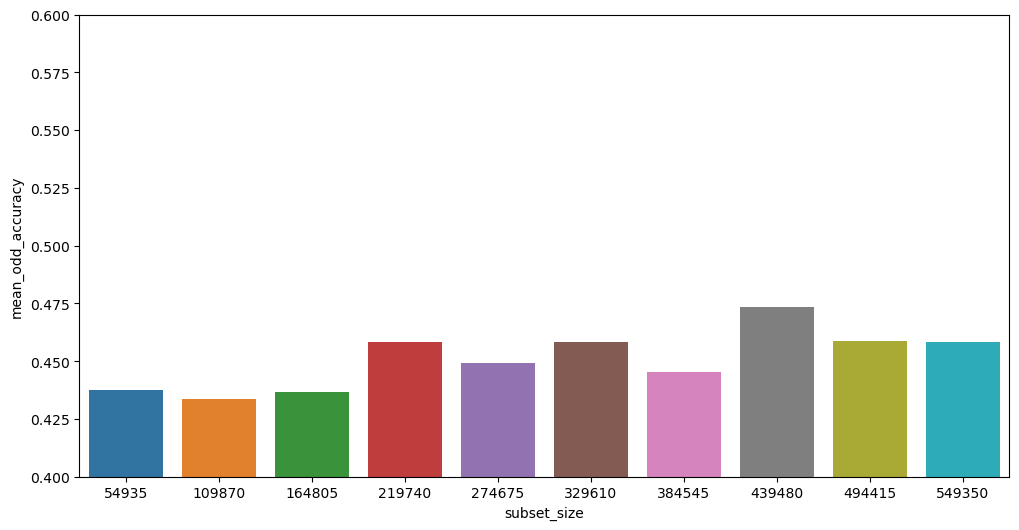

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], ax=ax)
plt.ylim(0.4, 0.6)

[(1.2, 1.6)]

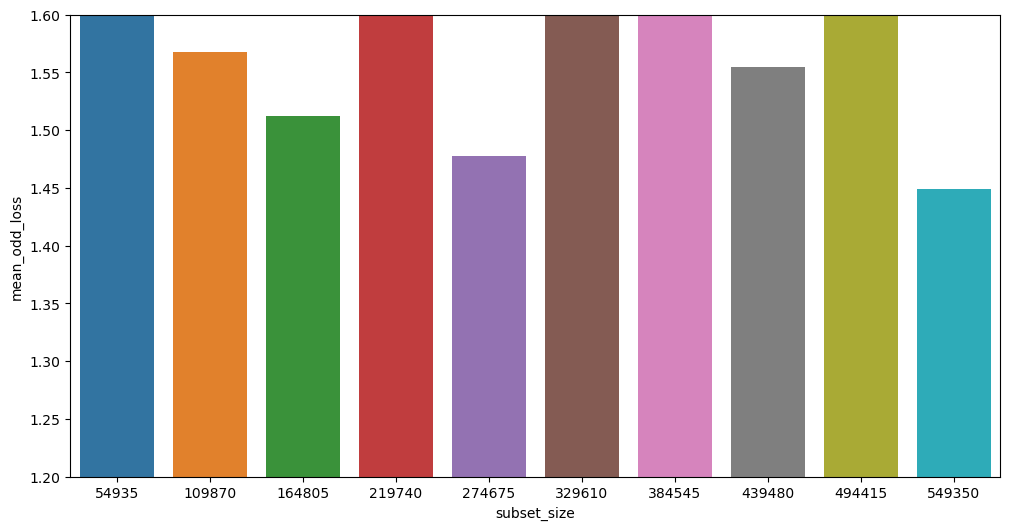

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(1.2, 1.6))

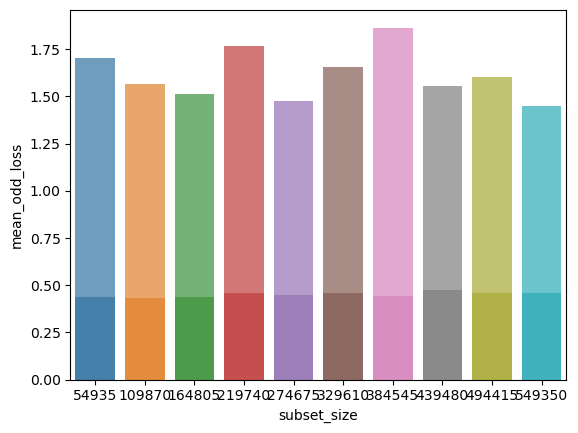

In [15]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)

[(0.4, 0.8)]

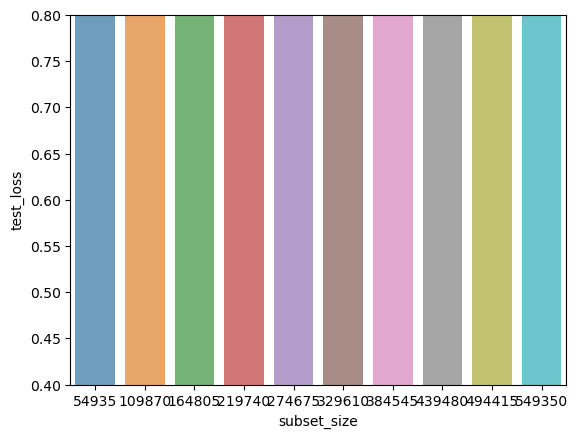

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

In [17]:
full_set_var_sum = np.mean((variance_metrics0['full_set_var_sum'], variance_metrics1['full_set_var_sum'], variance_metrics2['full_set_var_sum']))

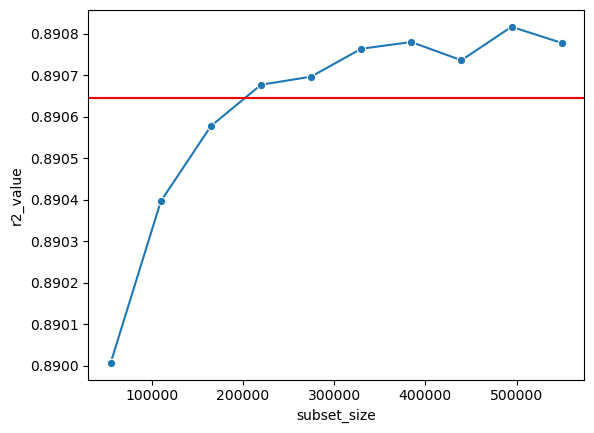

In [18]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(full_set_var_sum, color='red')

In [19]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed

In [20]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized

<Axes: xlabel='subset_size'>

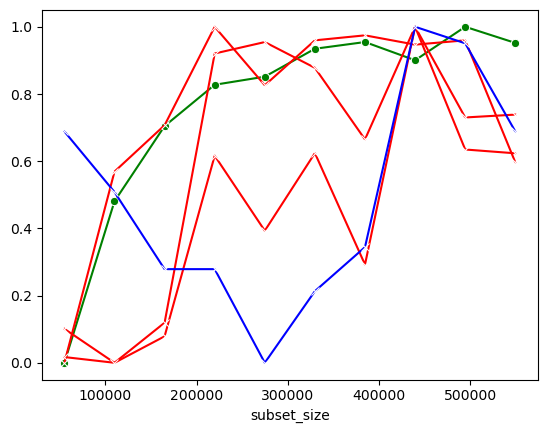

In [21]:
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['r2_value']), marker="o", color='green')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['mean_odd_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['mnli_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['sick_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['anli_r3_accuracy']), marker="x", color='blue')

<Axes: xlabel='subset_size', ylabel='anli_r3_accuracy'>

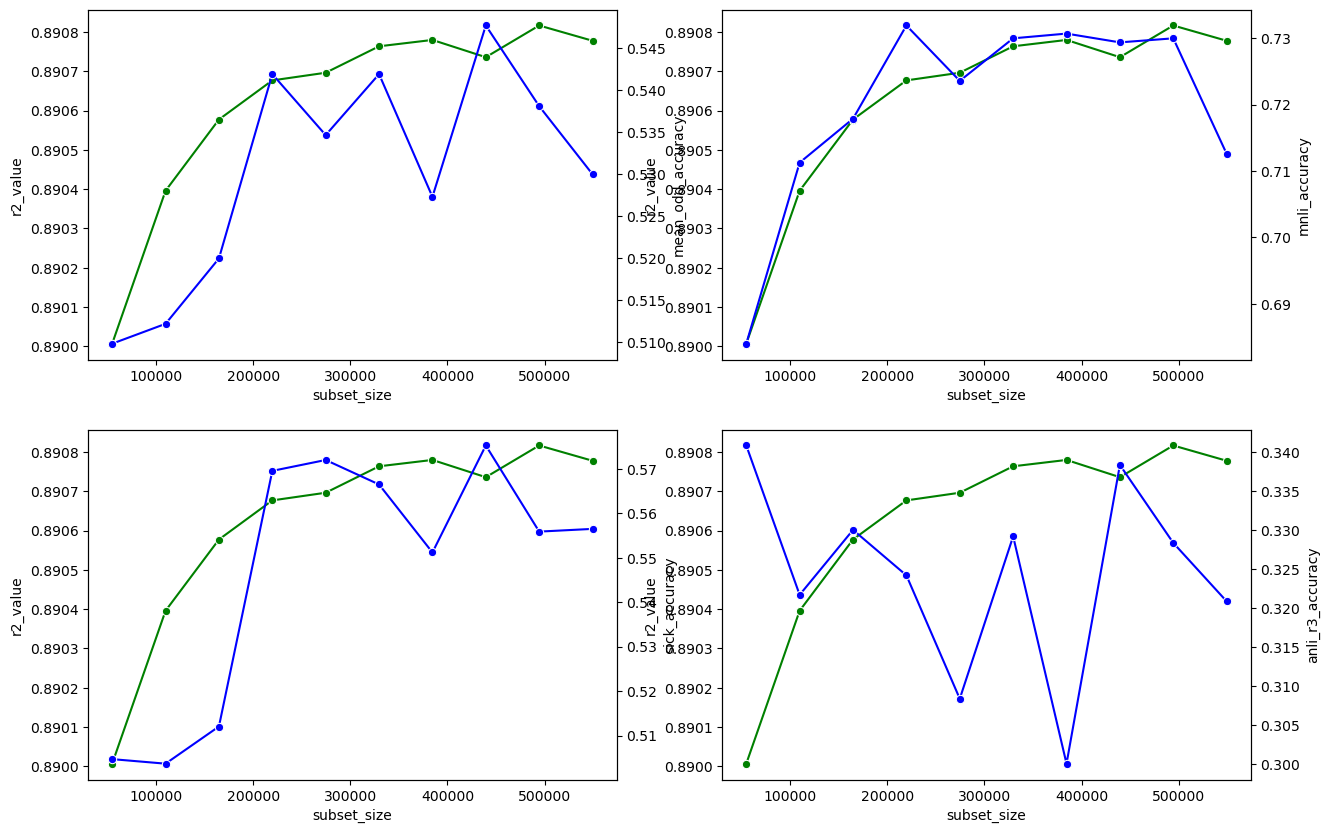

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mnli_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sick_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['anli_r3_accuracy'], color="b", ax=ax4, marker="o")

(0.3, 3.0)

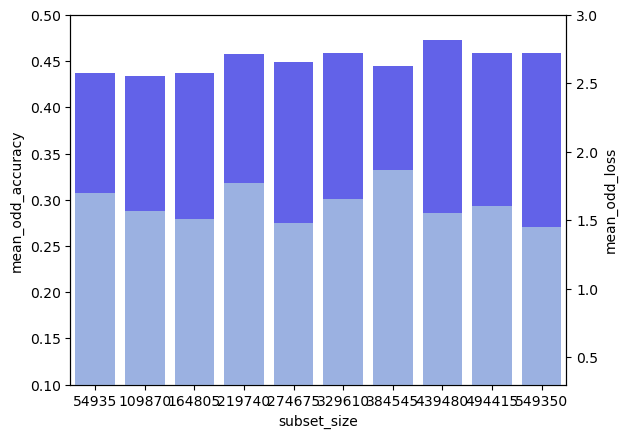

In [25]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.1, 0.5)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.3, 3.0)

(0.1, 0.7)

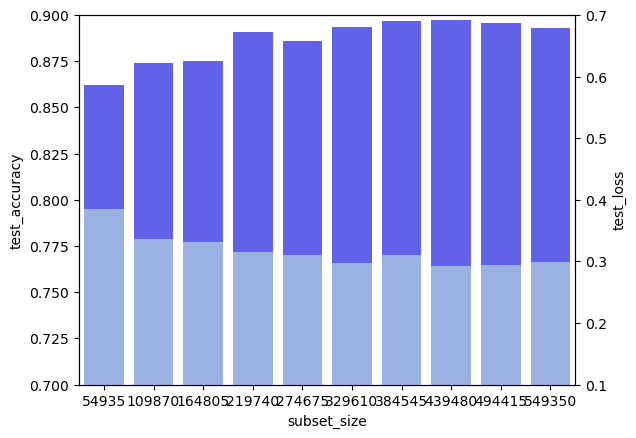

In [26]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.7, 0.9)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.1, 0.7)

In [27]:
results_df.to_csv('../analysis_results/snli.csv', index=False)